# Exploring ODF Extraction - Data Analysis
## Sam Potter
## Current: 4/15/19

## Path and Imports

In [1]:
import sys
import os

# psfdi
sys.path.extend(['C:\\Users\\potterst1\\Desktop\Repositories\Github\psfdi',
                 'C:/Users/potterst1/Desktop/Repositories/Github/psfdi'])
sys.path.extend(['/workspace/stpotter/git/bitbucket/psfdi'])

from psfdi import visualize
from psfdi import fileIO
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import patches
from matplotlib import rc
from psfdi import utilities
from psfdi import odf
from psfdi import image_processing as imp
import seaborn as sns
import cv2
import matplotlib

from ipywidgets import *
from scipy import optimize as sciopt
from scipy.stats import beta
from scipy.stats import sem

## Magics

In [2]:
%matplotlib inline

# Look at ODF data from SALS and compare with pSFDI a0, a2, a4

## Load Processed pSFDI Data

### Load in pSFDI Data

In [ ]:
pSFDI_data_path = 'C:\\Users\\potterst1\\Box Sync\\Research\\Projects\\IGA DIC pSFDI\\Experimental Data\\2D pSFDI data\\ODF Extraction\\4.15.19b\\2) pSFDI\\V_Green\data_proc.mat'
pSFDI_data = fileIO.read_mat_file(pSFDI_data_path)

phi = pSFDI_data['phi_DC'][:, :, 0]
a0 = pSFDI_data['a0_DC'][:, :, 0]
a2 = pSFDI_data['a2_DC'][:, :, 0]
a4 = pSFDI_data['a4_DC'][:, :, 0]
DOA = pSFDI_data['DOA_DC'][:, :, 0]

# Add 180
phi = phi + 180 * np.ones(phi.shape)

### Visualize data

In [ ]:
# PD
fig = plt.figure(figsize=(10, 10))
im0 = plt.imshow(phi, cmap='hsv');
plt.title('Fiber PD');
ax = plt.gca();
divider = make_axes_locatable(ax);
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(im0, cax=cax);

In [ ]:
# a0
fig = plt.figure(figsize=(10, 10))
im0 = plt.imshow(a0, cmap='gray')
plt.title('A0');

In [ ]:
# a2
fig = plt.figure(figsize=(10, 10))
im0 = plt.imshow(a2, cmap='jet')
plt.title('a2')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
colorlimits = (0, 0.05);
im0.set_clim(colorlimits)
plt.colorbar(im0, cax=cax);

In [ ]:
# a4
fig = plt.figure(figsize=(10, 10))
im0 = plt.imshow(a4, cmap='jet')
plt.title('a4')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
colorlimits = (0, 0.07);
im0.set_clim(colorlimits)
plt.colorbar(im0, cax=cax);

In [ ]:
# DOA
fig = plt.figure(figsize=(10, 10))
im0 = plt.imshow(DOA, cmap='jet')
plt.title('DOA')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
colorlimits = (0, .2);
im0.set_clim(colorlimits)
plt.colorbar(im0, cax=cax);

### Visualize a2/a4 ratio

In [ ]:
a2a4 = a2/a4
# a2/a4
fig = plt.figure(figsize=(10, 10))
im0 = plt.imshow(a2a4, cmap='jet')
plt.title('a2/a4')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
colorlimits = (0, 2);
im0.set_clim(colorlimits)
plt.colorbar(im0, cax=cax);

## Load Raw Intensity pSFDI Data

### Specify file paths

In [3]:
sample_data_path = 'C:\\Users\\potterst1\\Box Sync\\Research\\Projects\\IGA DIC pSFDI\\Experimental Data\\2D pSFDI data\\ODF Extraction\\4.15.19b\\2) pSFDI\\Sample\\Vertical\\Green'
standard_data_path = 'C:\\Users\\potterst1\\Box Sync\\Research\Projects\\IGA DIC pSFDI\\Experimental Data\\2D pSFDI data\\ODF Extraction\\4.15.19b\\1) Standard\\Standard\\Vertical\\Green'

### Load mask

In [4]:
xrange, yrange = fileIO.read_psfdi_mask(sample_data_path)

### Specify spatial frequency and polarizer resolution

In [5]:
sfx_per = 37.1622
polar_res = 4
polar_max = 180
polar_angles = np.arange(0, 180, polar_res)

### Load and crop sample data

In [6]:
sample_dark, sample_planar, sample_I0, sample_I120, sample_I240 = fileIO.read_raw_psfdi(sample_data_path, xrange, yrange, sfx_per, polar_res, polar_max)

### Visualize

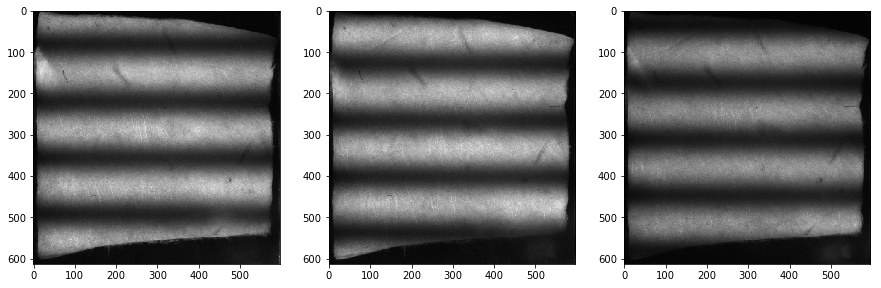

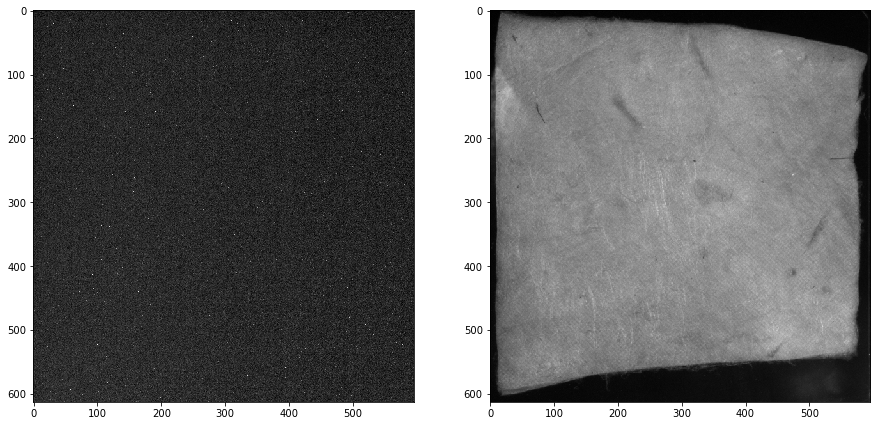

In [7]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 15))
ax0.imshow(sample_I0[0, :, :], cmap='gray');
ax1.imshow(sample_I120[0, :, :], cmap='gray');
ax2.imshow(sample_I240[0, :, :], cmap='gray');

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
ax0.imshow(sample_dark[0, :, :], cmap='gray')
ax1.imshow(sample_planar[0, :, :], cmap='gray');

### Load and crop standard images

### Median filter standard and dark images

### Demodulate Images

In [8]:
sample_IDC, sample_IAC = imp.demodulate(sample_I0, sample_I120, sample_I240, polar_res, polar_max)

### Visualize

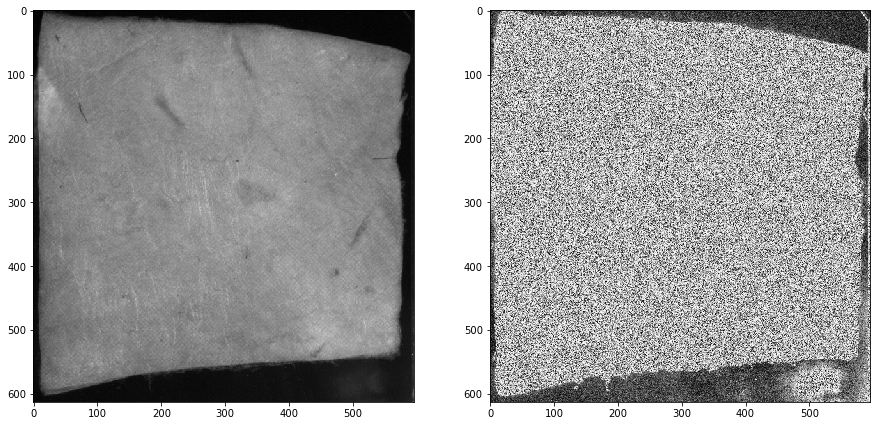

In [9]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
ax0.imshow(sample_IDC[0, :, :], cmap='gray')
ax1.imshow(sample_IAC[0, :, :], cmap='gray');

### Subtract out dark images

## Load in SALS data

In [10]:
SALS_data_path = 'C:\\Users\\potterst1\\Box Sync\\Research\\Projects\\IGA DIC pSFDI\\Experimental Data\\2D pSFDI data\\ODF Extraction\\SALS\\Results\\BP ODF 032919\\SALSA OUT TXT\\BP_ODF_Extraction_032919_SALSA.txt'

SALS_data_dict = fileIO.read_SALS(SALS_data_path)

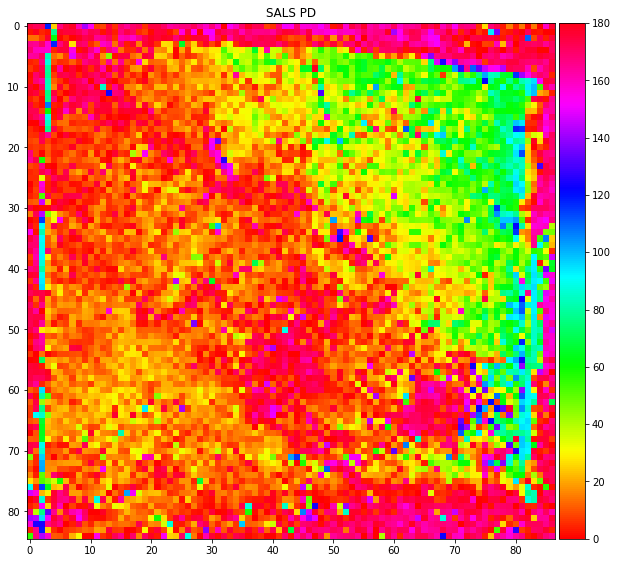

In [11]:
PD_2d = SALS_data_dict['PD']
# SALS PD
fig = plt.figure(figsize=(10, 10))
im0 = plt.imshow(PD_2d, cmap='hsv')
plt.title('SALS PD')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
colorlimits = (0, 180);
im0.set_clim(colorlimits)
plt.colorbar(im0, cax=cax);

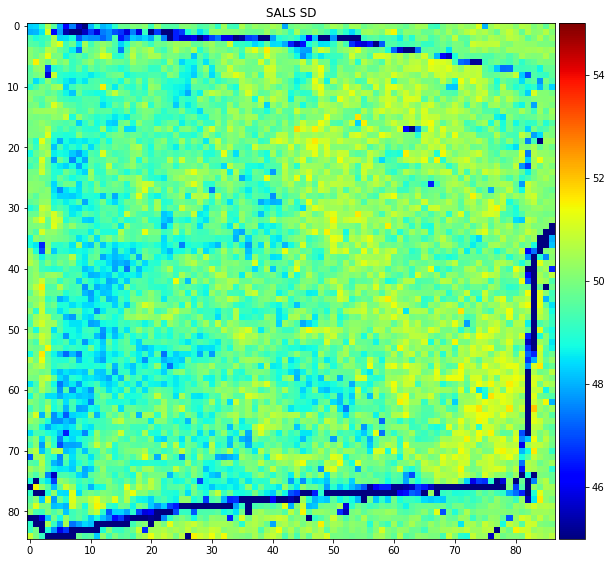

In [12]:
SD_2d = SALS_data_dict['SD']
# SALS SD
fig = plt.figure(figsize=(10, 10))
im0 = plt.imshow(SD_2d, cmap='jet')
plt.title('SALS SD')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
colorlimits = (45, 55);
im0.set_clim(colorlimits)
plt.colorbar(im0, cax=cax);

In [13]:
# Save a file for masking a mask
name = 'C:\\Users\\potterst1\\Box Sync\\Research\\Projects\\IGA DIC pSFDI\\Experimental Data\\2D pSFDI data\\ODF Extraction\\SALS\\Results\\BP ODF 032919\\BW_Images\\color_premask.png'
plt.imsave(name, SD_2d, format='png', cmap='jet', vmin=45, vmax=55)

## Compare pSFDI and SALS

### Resample images

In [ ]:
# Binary mask of pSFDI image
psfdi_mask_path = 'C:\\Users\\potterst1\\Box Sync\\Research\\Projects\\IGA DIC pSFDI\\Experimental Data\\2D pSFDI data\\ODF Extraction\\4.15.19b\\2) pSFDI\\V_Green\mask.tif'
psfdi_mask = cv2.imread(psfdi_mask_path, -1)

# Binary mask of SALS image
sals_mask_path = 'C:\\Users\\potterst1\\Box Sync\\Research\\Projects\\IGA DIC pSFDI\\Experimental Data\\2D pSFDI data\\ODF Extraction\\SALS\\Results\\BP ODF 032919\\BW_Images\\Mask.tif'
sals_mask = cv2.imread(sals_mask_path, -1)

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
im0 = ax0.imshow(psfdi_mask, cmap='gray')
ax0.set_title('Data Mask for pSFDI Imaging');

im1 = ax1.imshow(sals_mask, cmap='gray')
ax1.set_title('Data Mask for SALS Imaging');

In [ ]:
psfdi_mask_upscaled = imp.upscale(psfdi_mask, *sals_mask.shape)

In [ ]:
# Show the mask results without thresholding
fig = plt.figure(figsize=(10, 10))
im0 = plt.imshow(psfdi_mask_upscaled, cmap='gray')
plt.title('Upscaled pSFDI Mask Before Thresholding')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(im0, cax=cax);

In [ ]:
# Threshold mask, then plot
psfdi_mask_upscaled = psfdi_mask_upscaled >= 255
psfdi_mask_upscaled = 255 * psfdi_mask_upscaled.astype('uint8')

# Show the mask results after thresholding
fig = plt.figure(figsize=(10, 10))
im0 = plt.imshow(psfdi_mask_upscaled, cmap='gray')
plt.title('Upscaled pSFDI Mask After Thresholding')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(im0, cax=cax);

In [ ]:
# Upscale the rest of the data (phi)
psfdi_phi_upscaled = imp.upscale(phi, *sals_mask.shape)
psfdi_a0_upscaled = imp.upscale(a0, *sals_mask.shape)
psfdi_a2_upscaled = imp.upscale(a2, *sals_mask.shape)
psfdi_a4_upscaled = imp.upscale(a4, *sals_mask.shape)
psfdi_a2a4_upscaled = imp.upscale(a2a4, *sals_mask.shape)

### Register image data

In [ ]:
# Rotate psfdi image firts
psfdi_mask_rotated = imp.rotate(psfdi_mask_upscaled, -90)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
im0 = ax0.imshow(psfdi_mask_rotated, cmap='gray')
ax0.set_title('Data Mask for pSFDI Imaging');

im1 = ax1.imshow(sals_mask, cmap='gray')
ax1.set_title('Data Mask for SALS Imaging');

In [ ]:
# Register images
psfdi_mask_registered, warp_data = imp.register(psfdi_mask_rotated, sals_mask)

print('cc: {}'.format(warp_data['cc']))
print('warp matrix:')
print(warp_data['warp'])

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
im0 = ax0.imshow(psfdi_mask_registered, cmap='gray')
ax0.set_title('Data Mask for pSFDI Imaging');

im1 = ax1.imshow(sals_mask, cmap='gray')
ax1.set_title('Data Mask for SALS Imaging');

In [ ]:
# Register the rest of the data (phi)
psfdi_phi_rotated = imp.rotate(psfdi_phi_upscaled, -90)
psfdi_phi_rotated = psfdi_phi_rotated + 90 * np.ones(psfdi_phi_rotated.shape)  # Account for angle change

psfdi_phi_rotated[psfdi_phi_rotated > 180] = psfdi_phi_rotated[psfdi_phi_rotated > 180] - 180

psfdi_phi_registered = imp.warp(psfdi_phi_rotated, warp_data['warp'])

In [ ]:
# Register the rest of the data (a0)
psfdi_a0_rotated = imp.rotate(psfdi_a0_upscaled, -90)
psfdi_a0_registered = imp.warp(psfdi_a0_rotated, warp_data['warp'])

# Register the rest of the data (a2)
psfdi_a2_rotated = imp.rotate(psfdi_a2_upscaled, -90)
psfdi_a2_registered = imp.warp(psfdi_a2_rotated, warp_data['warp'])

# Register the rest of the data (a4)
psfdi_a4_rotated = imp.rotate(psfdi_a4_upscaled, -90)
psfdi_a4_registered = imp.warp(psfdi_a4_rotated, warp_data['warp'])

# Register the rest of the data (a2a4)
psfdi_a2a4_rotated = imp.rotate(psfdi_a2a4_upscaled, -90)
psfdi_a2a4_registered = imp.warp(psfdi_a2a4_rotated, warp_data['warp'])

### Visualize phi and a2a4 vs SD data

In [ ]:
# Phi vs PD first
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
im0 = ax0.imshow(psfdi_phi_registered, cmap='hsv')
divider = make_axes_locatable(ax0)
cax0 = divider.append_axes('right', size='5%', pad=0.05)
colorlimits = (0, 180);
im0.set_clim(colorlimits)
fig.colorbar(im0, cax=cax0)
ax0.set_title('pSFDI PD')

im1 = ax1.imshow(PD_2d, cmap='hsv')
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
colorlimits = (0, 180);
im1.set_clim(colorlimits)
fig.colorbar(im1, cax=cax1)
ax1.set_title('SALS PD');

In [ ]:
# a2a4 vs SD 
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
im0 = ax0.imshow(psfdi_a2a4_registered, cmap='jet')
divider = make_axes_locatable(ax0)
cax0 = divider.append_axes('right', size='5%', pad=0.05)
colorlimits = (0, 4);
im0.set_clim(colorlimits)
fig.colorbar(im0, cax=cax0)
ax0.set_title('pSFDI a2/a4')

im1 = ax1.imshow(SD_2d, cmap='jet')
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
colorlimits = (45, 55);
im1.set_clim(colorlimits)
fig.colorbar(im1, cax=cax1)
ax1.set_title('SALS SD');

### Check that specimens are aligned
## This is still broken - Need to look at circular unwrapping to make sure data is aligned

In [ ]:
phi_diff = np.abs(psfdi_phi_registered - PD_2d)

In [ ]:
# Show the mask results after thresholding
fig = plt.figure(figsize=(10, 10))
im0 = plt.imshow(phi_diff, cmap='jet')
plt.title('Absolute difference between pSFDI phi and SALS PD')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(im0, cax=cax);

In [ ]:
# Compute and report difference statistics
np.mean(phi_diff)

In [ ]:
np.std(phi_diff)

### Feasibility study of $\Gamma(\theta)$ and $I(\theta)$

## For now, going to use PD from SALS because PD in pSFDI just shifts the double cosine series

In [ ]:
# Visualize the change in signal from theta shift
a0_f = 0.4
a2_f = 0.01
a4_f = 0.4
phi_1_f = 10
phi_2_f = 25

theta = np.linspace(-90, 90, 100)
ifiber_1 = odf.Ifiber(a0_f, a2_f, a4_f, phi_1_f, theta)
ifiber_2 = odf.Ifiber(a0_f, a2_f, a4_f, phi_2_f, theta)

fig = plt.figure(figsize=(10, 10))
plt.plot(theta, ifiber_1, color='g', label='phi = {}'.format(phi_1_f));
plt.plot(theta, ifiber_2, color='r', label='phi = {}'.format(phi_2_f));
plt.title('Shift of PD Does Not Change Ratio betwee Cosine Peaks');
plt.xlabel('Theta')
plt.ylabel('Intensity [a.u.]')
plt.ylim(0, 1.5)
plt.autoscale(enable=True, axis='x', tight=True)

## Feasibility Study - Raw Data

### Rotate full scale data, but don't perform extra registration. This isn't completely correct, but okay for now. Can improve by multiplying warp matrix translation by numer of psfdi pixels in SALS pixel as a start.

In [ ]:
sample_IDC_rotated = [imp.rotate(sample_IDC[image, :, :], -90) for image in range(sample_IDC.shape[0])]
sample_IDC_rotated = np.array(sample_IDC_rotated)
sample_IAC_rotated = [imp.rotate(sample_IAC[image, :, :], -90) for image in range(sample_IAC.shape[0])]
sample_IAC_rotated = np.array(sample_IAC_rotated)
sample_planar_rotated = [imp.rotate(sample_planar[image, :, :], -90) for image in range(sample_planar.shape[0])]
sample_planar_rotated = np.array(sample_planar_rotated)

In [14]:
row = 20
col = 60
ydim = SALS_data_dict['PD'].shape[0]

row_step = int(sample_IDC.shape[1] / SALS_data_dict['PD'].shape[0])
col_step = int(sample_IDC.shape[2] / SALS_data_dict['PD'].shape[1])

psfdi_row = row * row_step
psfdi_col = col * col_step

index = col * ydim + (ydim - col)

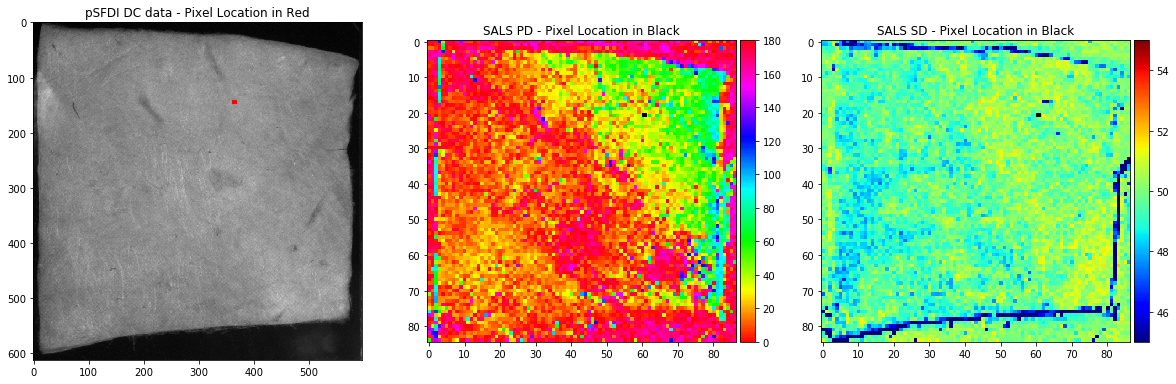

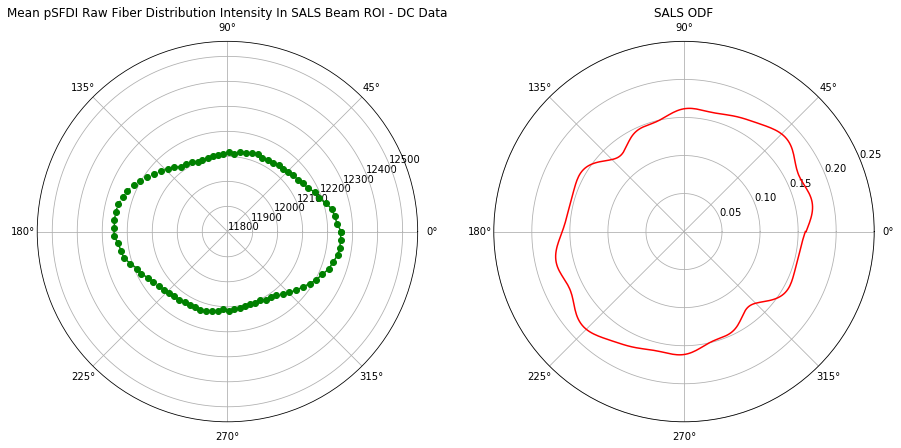

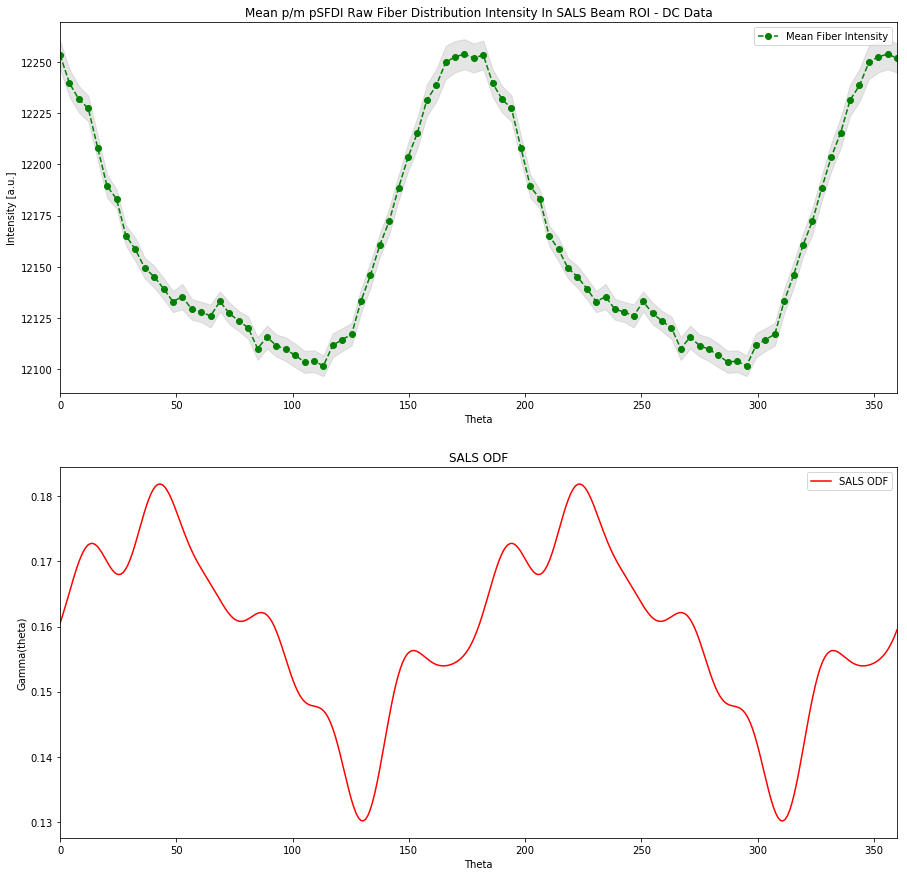

In [15]:
visualize.compare_raw_interactive(row, col, sample_IDC, 'DC', SALS_data_dict, roll=22)

## Fourier Series Fit

In [16]:
odf_theta = SALS_data_dict['theta'][index, :]
odf_gamma = SALS_data_dict['odf'][index, :]

In [17]:
an, bn, c = odf.fit_fourier(20, odf_gamma, odf_theta)
odf_fsfit = odf.compute_fourier(an, bn, c, odf_theta)

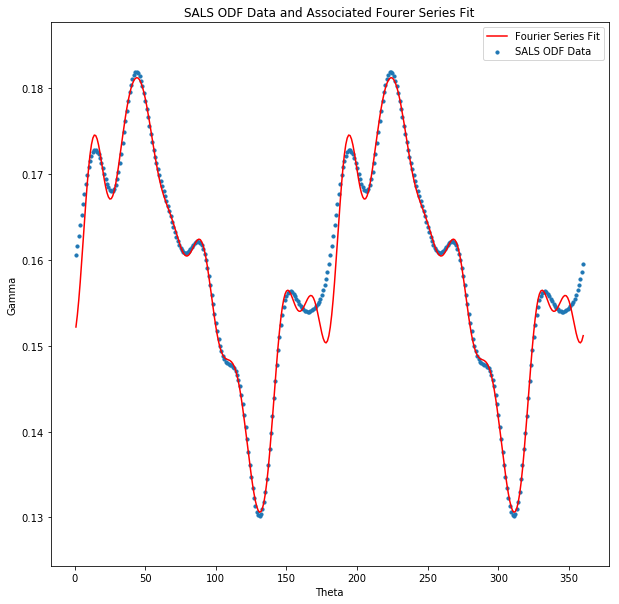

In [18]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(np.rad2deg(odf_theta), odf_gamma, marker='o', s=10, label='SALS ODF Data')
plt.plot(np.rad2deg(odf_theta), odf_fsfit, color='r', label='Fourier Series Fit');
plt.ylabel('Gamma');
plt.xlabel('Theta');
plt.legend()
plt.title('SALS ODF Data and Associated Fourer Series Fit');

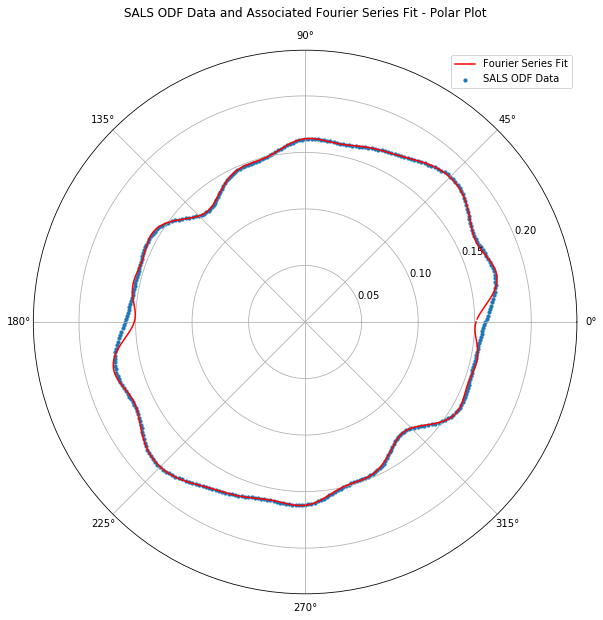

In [19]:
fig = plt.figure(figsize=(10, 10))
plt.polar(odf_theta, odf_fsfit, color='r', label='Fourier Series Fit');
plt.scatter(odf_theta, odf_gamma, s=10, label='SALS ODF Data');
plt.legend()
plt.title('SALS ODF Data and Associated Fourier Series Fit - Polar Plot');

## Compute the Primary and Secondary Directions

In [20]:
theta1, theta2 = odf.structural_eigenval_thetas(an[0], bn[0])

In [21]:
print('Theta I (deg): {}'.format(theta1))
print('Theta II (deg): {}'.format(theta2))

Theta I (deg): 41.15610900273397
Theta II (deg): 131.15610900273398


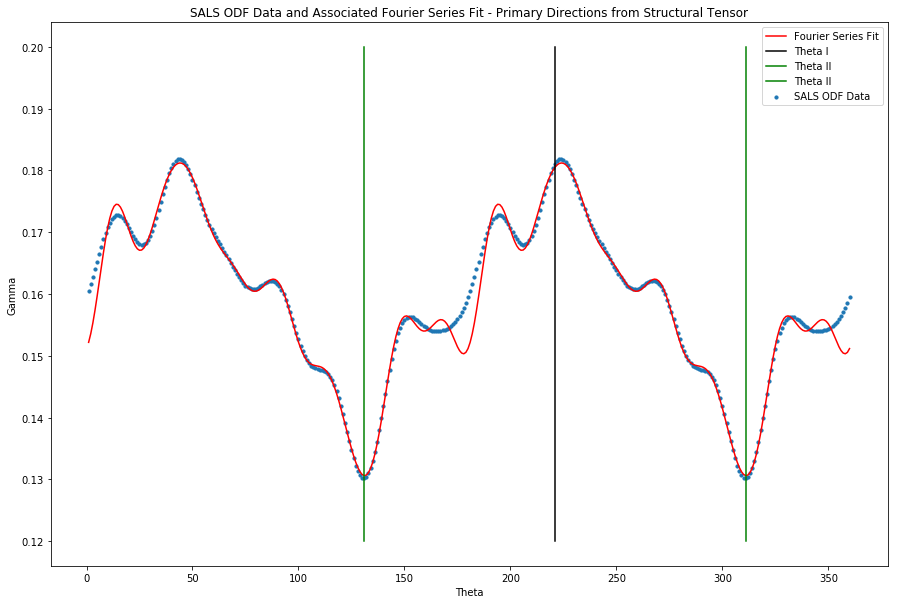

In [22]:
fig = plt.figure(figsize=(15, 10))
plt.scatter(np.rad2deg(odf_theta), odf_gamma, s=10, label='SALS ODF Data');
plt.plot(np.rad2deg(odf_theta), odf_fsfit, color='r', label='Fourier Series Fit')
plt.plot((theta1 + 180) * np.ones(len(odf_theta)), np.linspace(0.12, 0.20, len(odf_theta)), color='k', label='Theta I')
plt.plot(theta2 * np.ones(len(odf_theta)), np.linspace(0.12, 0.20, len(odf_theta)), color='g', label='Theta II')
plt.plot((theta2 + 180) * np.ones(len(odf_theta)), np.linspace(0.12, 0.20, len(odf_theta)), color='g', label='Theta II')
plt.xlabel('Theta')
plt.ylabel('Gamma')
plt.legend();
plt.title('SALS ODF Data and Associated Fourier Series Fit - Primary Directions from Structural Tensor');

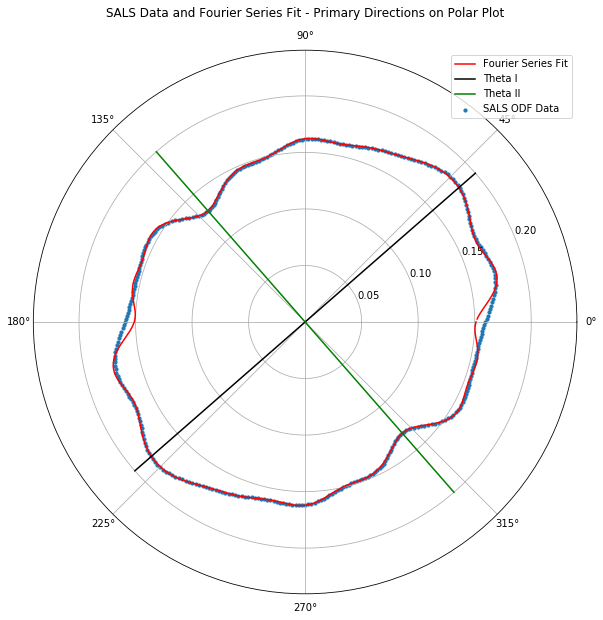

In [23]:
theta1_r = np.deg2rad(theta1)
theta2_r = np.deg2rad(theta2)
fig = plt.figure(figsize=(10, 10))
plt.polar(odf_theta, odf_fsfit, color='r', label='Fourier Series Fit');
plt.scatter(odf_theta, odf_gamma, s=10, label='SALS ODF Data');
plt.polar([theta1_r, theta1_r + np.pi], [0.20, 0.20], color='k', label='Theta I')
plt.polar([theta2_r, theta2_r + np.pi], [0.20, 0.20], color='g', label='Theta II')
plt.legend()
plt.title('SALS Data and Fourier Series Fit - Primary Directions on Polar Plot');